In [1]:
import yt
from netCDF4 import Dataset
import numpy as np

In [21]:
data_filename = "data/Tomography_Models/DNA13_percent.nc"

nc_dataset = Dataset(data_filename, 'r+')
latitude = nc_dataset.variables["latitude"][:]
longitude = nc_dataset.variables["longitude"][:]
depth = 6371 - nc_dataset.variables["depth"][:][::-1]

In [25]:
data = {}

print(nc_dataset.variables["depth"])

print(nc_dataset.variables.keys())

for v in ('vp', 'vsh', 'vsv', 'vsvj'):
    print(v)
    print(nc_dataset.variables[v])
    # print(nc_dataset.variables[v].ncattrs())
    # nc_dataset.variables[v].setncattr('valid_range', [-1000.,1000.])
    # nc_dataset.variables['vp'].valid_range= [-1000.,1000.]
    # print(nc_dataset.variables[v][:])
    # data[v] = nc_dataset.variables[v][::-1,::-1,:]

<class 'netCDF4._netCDF4.Variable'>
float32 depth(depth)
    long_name: depth below earth surface
    units: kilometer
    positive: down
unlimited dimensions: 
current shape = (129,)
filling on, default _FillValue of 9.969209968386869e+36 used
dict_keys(['depth', 'latitude', 'longitude', 'vp', 'vsh', 'vsv', 'vsvj'])
vp
<class 'netCDF4._netCDF4.Variable'>
float32 vp(depth, latitude, longitude)
    long_name: P-velocity in %dVp
    valid_range: [-1000.  1000.]
    missing_value: 99999.0
    _FillValue: 99999.0
    add_offset:   0.f
    scale_factor:   2.f
unlimited dimensions: 
current shape = (129, 55, 109)
filling on
vsh
<class 'netCDF4._netCDF4.Variable'>
float32 vsh(depth, latitude, longitude)
    long_name: SH-velocity in %dVs
    valid_range: [-1000.  1000.]
    missing_value: 99999.0
    _FillValue: 99999.0
    add_offset:   0.f
    scale_factor:   2.f
unlimited dimensions: 
current shape = (129, 55, 109)
filling on
vsv
<class 'netCDF4._netCDF4.Variable'>
float32 vsv(depth, latit

In [26]:
data_filename = "data/Tomography_Models/DNA13_percent.nc"

v_names = ('vp', 'vsh', 'vsv', 'vsvj')

for v in v_names:
    nc_dataset.variables[v].valid_range = [-1000.0, 1000.0]

nc_dataset = Dataset(data_filename)
latitude = nc_dataset.variables["latitude"][:]
longitude = nc_dataset.variables["longitude"][:]
depth = 6371 - nc_dataset.variables["depth"][:][::-1]

data = {v: nc_dataset.variables[v][::-1,::-1,:] for v in v_names}

bbox = np.array([[depth[0], depth[-1]],
                [latitude[0], latitude[-1]],
                [longitude[0],longitude[-1]]])
print(bbox)
ds = yt.load_uniform_grid(data, domain_dimensions = (depth.shape[0], latitude.shape[0], longitude.shape[0]),
                          bbox = bbox, length_unit=1000,
                          geometry = ("internal_geographic", ("depth", "latitude", "longitude")),
)

ds.outer_radius = yt.units.km * 6371

AttributeError: NetCDF: Write to read only

[[5091. 6371.]
 [  25.   52.]
 [ 234.  288.]]


In [12]:
ds.domain_width

In [13]:
ds.domain_left_edge

In [14]:
ds.domain_right_edge

yt : [INFO     ] 2022-06-13 10:42:23,256 xlim = 234.000000 288.000000
yt : [INFO     ] 2022-06-13 10:42:23,256 ylim = 25.000000 52.000000
yt : [INFO     ] 2022-06-13 10:42:23,257 Making a fixed resolution buffer of (vp) 800 by 800
yt : [INFO     ] 2022-06-13 10:42:23,282 Making a fixed resolution buffer of (('stream', 'vp')) 800 by 800
yt : [WARNING  ] 2022-06-13 10:42:23,292 Plotting ('stream', 'vp'): Both positive and negative values. Min = -0.9250000119213881 dimensionless, Max = 0.6970000267032269 dimensionless.
yt : [WARNING  ] 2022-06-13 10:42:23,293 Switching to symlog colorbar scaling.



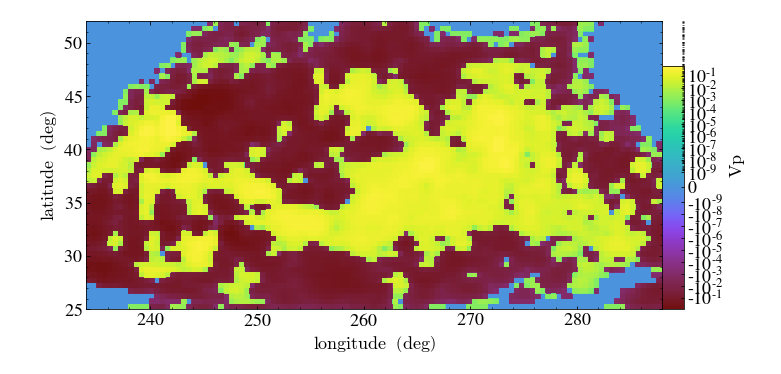


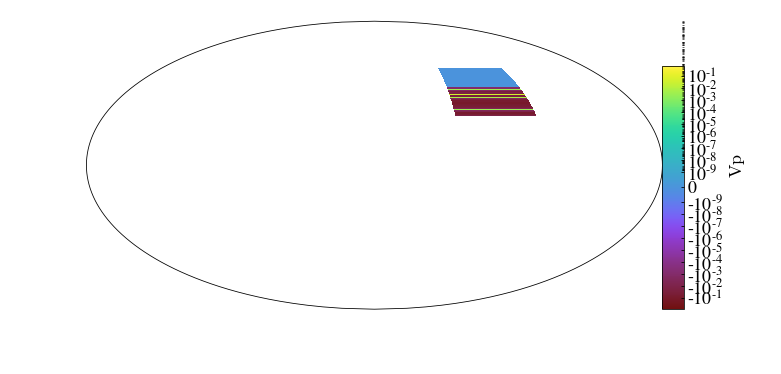

In [15]:
ds.r[6000,:,:].plot("vp").set_mpl_projection("Mollweide")

In [17]:
s = yt.SlicePlot(ds, "depth", "vp", 6000)

/Users/tzacks2/.conda/envs/DataViz/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: SlicePlot's argument 'axis' is a deprecated alias for 'normal', it will be removed in a future version of yt.
Deprecated since v4.0.0. This feature will be removed in v4.1.0
  """Entry point for launching an IPython kernel.


TypeError: SlicePlot() received incompatible arguments 'axis' and 'normal'